Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "HARSHUL GUPTA"

## Numerical Methods for HJB Equations and Mean Field Games

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project.

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained.

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


## Abstract

### A brief description of the problem
The goal of this project is to review certain numerical methods proposed for the solution of Hamilton-Jacobi-Bellman (HJB) equations and their application to problems in Mean Field Games (MFG). This involves the derivation of finite difference methods and the analysis of partial differential equations modeling interactions between multiple agents.

### A brief justification describing why this problem is important/interesting to you
This topic is important because it forms the foundation of optimal control theory, which has broad applications in fields such as economics, finance, and social systems. The study of HJB equations in the context of MFGs is of particular interest to me, as it aligns with my passion for improving decision-making processes in complex, large-scale systems through applied mathematics.

### A general description of the computational approach
The computational approach explores a simplified version of MFGs through a Forward-Backward PDE system. We model the underlying process as a controlled diffusion and seek the optimal control `u` and the flow of probability densities `m` that satisfy both the HJB and Kolmogorov-Fokker-Planck (KFP) equations. The HJB equation is supplemented with a terminal condition, while the KFP equation is supplemented with an initial condition. The main challenge of the project arises from the forward-backward duality of the system, which is solved through Picard Fixed Point iterations.

### A brief summary of what you did and what you learned
In this work, I implemented and analyzed various numerical methods for solving these equations, including finite difference schemes for spatial and temporal discretization. The solution methodology alternates between solving the HJB and KFP equations using Picard iteration. I explored the convergence properties of these methods and observed how model parameters such as volatility and risk aversion influence the evolution of the solution. Through this process, I gained insights into both the numerical methods employed and the theoretical implications of the HJB and KFP system in MFGs.
you learned

## Introduction [15 pts]

In ~4-5 paragraphs, describe
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve.

Please use proper spelling and grammar.

### Introduction

In this project, we focus on developing and implementing numerical methods for solving Hamilton-Jacobi-Bellman (HJB) equations, specifically within the context of Mean Field Games (MFGs). MFGs model the behavior of large populations of agents who make decisions based on both their own state and the statistical distribution of the states of other agents. Solving the coupled system of HJB and Kolmogorov-Fokker-Planck (KFP) equations that govern MFGs is a challenging problem due to their nonlinearity and the complexity of modeling interactions within large populations. By solving these equations numerically, we aim to improve the understanding of complex systems and decision-making processes in economics, social sciences, and other fields.

This problem is important because MFGs have broad applications in areas like economics, finance, and social systems. By developing efficient numerical methods for solving the HJB equations in MFGs, we aim to contribute to the advancement of decision-making models in large-scale systems. This is particularly relevant to fields such as market dynamics, traffic flow, and agent-based modeling. In the future, we plan to expand our work to include other important applications of HJB equations, such as mass transport image registration and American options pricing in finance. These applications are crucial in medical imaging, computer vision, and financial modeling, and they also involve solving HJB equations but in different contexts.

In this project, we focus on the numerical solution of MFGs, specifically solving the coupled HJB-KFP system. We propose using multigrid methods to solve these equations efficiently. The main challenge lies in the forward-backward duality between the HJB and KFP equations. We use Picard Fixed Point iterations to solve this system iteratively. The solution of these equations will help us better understand the optimal behavior of agents in a population and how their actions affect the collective outcome.

The study of mass transport image registration and American options pricing are also important applications of HJB equations. However, we will not focus on these applications in this project but plan to address them in future work. Mass transport image registration involves aligning images using the HJB formulation of a Monge-Ampère equation, while American options pricing involves using HJB equations in the context of optimal stopping problems. We will extend the methods developed for MFGs to these other problems in future studies.

### Basic Equations:
- **Mean Field Games (MFGs)**:
  - Hamilton-Jacobi-Bellman (HJB) equation:
    $$
    \frac{\partial V}{\partial t} + \frac{1}{2} \| \nabla V \|^2 + H(x, \nabla V, m) = 0, \quad \text{for } t \in [0,T]
    $$
  - Kolmogorov-Fokker-Planck (KFP) equation:
    $$
    \frac{\partial m}{\partial t} - \nabla \cdot \left( m(x,t) \nabla H(x, \nabla V, m) \right) = 0, \quad \text{for } t \in [0,T]
    $$

In the future, we plan to implement the following applications:
- **Mass Transport Image Registration**:
  - Monge-Ampère equation (converted to HJB form):
    $$
    \det(\nabla^2 \phi(x)) = \rho(x), \quad x \in \mathbb{R}^d
    $$

- **American Options Pricing**:
  - HJB equation for American options:
    $$
    \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 \frac{\partial^2 V}{\partial x^2} + rV - \max(K - x, 0) = 0, \quad \text{for } t \in [0,T]
    $$


### References



1. [MFGLib GitHub Repository](https://github.com/radar-research-lab/MFGLib/tree/main)
2. [HJB Solver GitHub Repository](https://github.com/GregorDeCillia/HJB-solver)
3. [Mean Field Games Numerical Methods - ODL23 Vanguard Lecture 2](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://mlauriere.github.io/teaching/MFGNUM-ODL23Vanguard-Lec2.pdf)
4. [ISOTACE Beamer Slides](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://project.inria.fr/isotace/files/2013/02/beamer_slides_dauphine.pdf)
5. [Workshop on Numerics for MFGs - Thomas Bourany](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://thomasbourany.github.io/files/Workshop_Numerics_MFGs_TBourany_wpause.pdf)
6. [Numerical Methods for Mean Field Games - University of Waterloo](https://uwspace.uwaterloo.ca/items/f71e5095-3359-4227-b159-3fb5ce0382f4)
7. [Numerical Methods for Mean Field Games - SIAM](https://epubs.siam.org/doi/10.1137/090758477)
e/main)


## Computational  Methods [5 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem.

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices.




### Computational Methods

To solve the problem of Mean Field Games (MFGs), we will implement a computational approach that primarily focuses on solving the Hamilton-Jacobi-Bellman (HJB) and Kolmogorov-Fokker-Planck (KFP) equations. The main numerical method we will use is Picard Fixed Point Iteration, which is ideal for solving nonlinear systems of equations that arise in MFGs.

For discretization, we will utilize finite difference methods to approximate the HJB and KFP equations. The spatial domain will be discretized on a uniform grid, and time steps will be chosen adaptively to ensure stability. The general form of the HJB equation is:

$$
\frac{\partial V}{\partial t} + \min_{u \in U} \left\{ \mathcal{L}_u V(x,t) + f(x,t,u) \right\} = 0
$$

where $V(x,t)$ represents the value function, $u$ is the control, $\mathcal{L}_u$ is the controlled differential operator, and $f(x,t,u)$ is the running cost. Similarly, the KFP equation, which models the evolution of the density of agents in MFGs, is given by:

$$
\frac{\partial m}{\partial t} + \nabla \cdot (m \nabla H(x,t)) = 0
$$

where $m(x,t)$ is the density function of agents, and $H(x,t)$ is the Hamiltonian associated with the system.

To enhance computational efficiency, we will implement a multigrid method for solving the discretized systems, which improves convergence rates and reduces computational time compared to traditional methods. The multigrid method will be implemented with a novel approach where artificial viscosity is subtracted from the coarse grid operators, leading to more accurate coarse grid error estimations.

We will also employ the `MFGLib` library, which provides efficient tools for solving MFGs, and the `HJB-solver` repository to aid in implementing the numerical solution of HJB equations. These libraries offer pre-built functions and optimizations specifically designed for solving such equations in the context of MFGs.

The implementation will be focused on the Mean Field Games case, but methods for mass transport image registration and American options pricing will be explored in future extensions of the project.


**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [3]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
import numpy as np
import scipy
import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work.

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling).
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

# Numerical Methods for HJB Equations and Mean Field Games Implementation


## Hamilton-Jacobi-Bellman (HJB) Equations

The goal of this thesis is to propose numerical methods for solving **HJB equations**, which are nonlinear controlled partial differential equations (PDEs) arising from **optimal control theory**.

Consider a dynamical system where a controller, starting at state $ (x, t) $, controls the future evolution of the state via a control variable $ c $, aiming to optimize a cumulative objective function. For example, in a competitive smartphone market, a company sets its smartphone price (control variable) based on its current capacity (state) to maximize long-term profit (objective function).

We are interested in two key quantities:
1. **Value function** $ u(x, t) $, which represents the optimal objective function.
2. **Optimal control** $ c^*(x, t) $, which maximizes the objective function.

An HJB equation models this system by coupling the value function $ u(x, t) $ and the optimal control $ c^*(x, t) $ as follows:

1. **HJB Equation**:
   $$
   L_{c^*}(x,t) u(x, t) = 0,
   $$
   where $ L $ is a second-order differential operator acting on $ u(x, t) $.

2. **Optimal Control Condition**:
   $$
   c^*(x, t) = \arg \max_{c(x,t)} H(x, t; c(x,t); u(x,t)),
   $$
   where $ H $ is the **Hamiltonian**, and optimizing it is equivalent to solving the dynamic programming problem.

The HJB equation couples two sub-problems:
- A **PDE**, where the solution is the value function $ u(x, t) $ for a given optimal control $ c^*(x, t) $.
- An **optimization problem** to find the control $ c(x,t) $ that optimizes the Hamiltonian.

Solving the HJB equation gives both the value function $ u(x, t) $ and the optimal control $ c^*(x, t) $ simultaneously.


## Mean Field Games (MFG)

Mean Field Games (MFG) are a subfield of game theory in continuous spacetime, where a large number of players interact in a competitive setting. A typical example is the competitive smartphone market, where each company optimizes its pricing strategy (control) based on its current state.

When there are many companies, the system becomes extremely complex, with each company's actions affecting all others. However, as the number of companies \( N \) becomes large, each company’s impact on the entire system becomes negligible, simplifying the model. In this "mean field" approximation, companies respond to the average behavior (distribution) of other companies, rather than to individual actions.

Mathematically, this leads to a system of two nonlinear PDEs:
1. A **Hamilton-Jacobi-Bellman (HJB) equation** for the value function of all players.
2. A **Kolmogorov-Fokker-Planck (KFP) equation** for the distribution of the players’ states.

This MFG model provides a good approximation of the original \( N \)-player game when \( N \) is large, greatly simplifying the system. MFGs have numerous applications, including in economics, sociology, engineering, and urban planning, where large populations of agents interact under competitive conditions.


## Introduction to Mean Field Games Theory

We fix a finite time horizon $T > 0$ and work in the state space $\mathbb{R}^d$. Let $f: \mathbb{R}^d \times \mathbb{R} \times \mathbb{R}^d \to \mathbb{R}$ and $\varphi: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ be the running cost and terminal cost, respectively.

### The Mean Field Game Problem
We seek a flow of probability densities $\hat{m}$ and a feedback control $\hat{v}$ that satisfy the following conditions:
1. **Control Problem**: Minimize the cost functional $J_{\hat{m}}(v)$ for a feedback control $v$:
   $$
   J_{\hat{m}}(v) = \mathbb{E} \left[ \int_0^T f(X_v(t), \hat{m}(t, X_v(t)), v(t, X_v(t))) \, dt + \varphi(X_v(T), \hat{m}(T, X_v(T))) \right]
   $$
2. **Stochastic Dynamics**: The process $X_v(t)$ solves the SDE:
   $$
   dX_v(t) = b(X_v(t), \hat{m}(t, X_v(t)), v(t, X_v(t))) \, dt + \sigma dW_t
   $$
   where $\sigma > 0$, and $X_v(0)$ is distributed according to $m_0$.

3. **Density Constraint**: $\hat{m}(t, \cdot)$ is the law of $X_v(t)$.

### Kolmogorov-Fokker-Planck Equation
For a given feedback control $v$, the density $m_v(t)$ of $X_v(t)$ solves the KFP equation:
$$
\partial_t m_v(t, x) - \nu \Delta m_v(t, x) + \text{div}(m_v(t, \cdot) b(\cdot, m_v(t, \cdot), v(t, \cdot))) = 0
$$
where $\nu = \frac{\sigma^2}{2}$.

### Value Function and HJB Equation
The value function $u(t, x)$ of the control problem satisfies the HJB equation:
$$
\partial_t u(t, x) + \nu \Delta u(t, x) - H(x, m(t, x), \nabla u(t, x)) = 0
$$
with the Hamiltonian:
$$
H(x, m, p) = \sup_{\gamma \in \mathbb{R}^d} \left( - f(x, m, \gamma) - \langle b(x, m, \gamma), p \rangle \right)
$$
where we assume $H$ is well-defined, $C^1$ with respect to $(x, p)$, and strictly convex in $p$.

### Forward-Backward PDE System
The system of equations for $(u, m)$ is:
$$
\begin{aligned}
- \partial_t u(t, x) - \nu \Delta u(t, x) + H(x, m(t, x), \nabla u(t, x)) &= 0 \\
\partial_t m(t, x) - \nu \Delta m(t, x) - \text{div}\left( m(t, \cdot) \partial_p H(\cdot, m(t, \cdot), \nabla u(t, \cdot)) \right) &= 0
\end{aligned}
$$
with boundary conditions:
$$
u(T, x) = \varphi(x, m(T, x)), \quad m(0, x) = m_0(x)
$$

This forward-backward system describes the dynamics of both the optimal control and the distribution of agents in a Mean Field Game.


Let $N_T$ and $N_h$ be two positive integers. We consider $N_T + 1$ points in time and $N_h$ points in space. Define the time step $\Delta t = \frac{T}{N_T}$ and the spatial step $h = \frac{1}{N_h - 1}$, with $t_n = n \cdot \Delta t$ and $x_i = i \cdot h$ for $(n, i) \in \{0, \dots, N_T\} \times \{0, \dots, N_h - 1\}$.

We approximate the functions $u$ and $m$ by vectors $U$ and $M$ in $\mathbb{R}^{(N_T + 1) \times N_h}$, so that:
$$
u(t_n, x_i) \approx U_{n,i}, \quad m(t_n, x_i) \approx M_{n,i}, \quad \forall (n, i) \in \{0, \dots, N_T\} \times \{0, \dots, N_h - 1\}.
$$

To handle **Neumann boundary conditions**, we introduce **ghost nodes** at $x_{-1} = -h$ and $x_{N_h} = 1 + h$, and set:
$$
U_{n,-1} = U_{n,0}, \quad U_{n,N_h} = U_{n,N_h-1}, \quad M_{n,-1} = M_{n,0}, \quad M_{n,N_h} = M_{n,N_h-1}.
$$


## Finite Differences Operators

We introduce the following finite difference operators:

- **First derivative with respect to time**:
  $$
  \partial_t w(t_n, x) \leftrightarrow (D_t W)_n = \frac{W_{n+1} - W_n}{\Delta t}, \quad n \in \{0, \dots, N_T - 1\}, \quad W \in \mathbb{R}^{N_T + 1}
  $$

- **First derivative with respect to space**:
  $$
  \partial_x w(t, x) \leftrightarrow (D_x W)_i = \frac{W_{i+1} - W_i}{h}, \quad i \in \{0, \dots, N_h - 1\}, \quad W \in \mathbb{R}^{N_h}
  $$

- **Second derivative with respect to space**:
  $$
  \partial_x^2 w(t, x) \leftrightarrow (\Delta_h W)_i = \frac{W_{i+1} - 2W_i + W_{i-1}}{h^2}, \quad i \in \{0, \dots, N_h - 1\}, \quad W \in \mathbb{R}^{N_h}
  $$

- **Gradient in space**:
  $$
  [\nabla_h W]_i = \left( (D_x W)_i, (D_x W)_{i-1} \right), \quad i \in \{0, \dots, N_h - 1\}, \quad W \in \mathbb{R}^{N_h}
  $$

These operators can be represented in matrix form. Consider a matrix $W \in \mathbb{R}^{(N_T + 1) \times N_h}$, we have:

- **First derivative with respect to space**:

  $$
  \partial_x(t_n, x_i) \quad (0 \leq n \leq N_T, \, 0 \leq i \leq N_h - 1) \leftrightarrow \frac{1}{h}
  \begin{pmatrix}
  -1 & 1 & 0 & \cdots & 0 \\
  0 & -1 & 1 & \cdots & 0 \\
  0 & 0 & -1 & 1 & \cdots \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & 0 & -1 & 1 \\
  0 & 0 & \cdots & 0 & 0 & 0
  \end{pmatrix}
  \begin{pmatrix}
  W_0^0 & W_1^0 & \cdots & W_{N_T}^0 \\
  W_0^1 & W_1^1 & \cdots & W_{N_T}^1 \\
  \vdots & \vdots & \ddots & \vdots \\
  W_0^{N_h-1} & W_1^{N_h-1} & \cdots & W_{N_T}^{N_h-1}
  \end{pmatrix}
  $$

  In the last row, we take into account the **Neumann boundary conditions**, considering that $U_{N_h} = U_{N_h-1}$ and $M_{N_h} = M_{N_h-1}$. Let $D_x$ be the matrix above.

- **Second derivative with respect to space**:

  $$
  \partial_x^2(t_n, x_i) \quad (0 \leq n \leq N_T, \, 0 \leq i \leq N_h - 1) \leftrightarrow \frac{1}{h^2}
  \begin{pmatrix}
  -1 & 1 & 0 & \cdots & 0 \\
  1 & -2 & 1 & 0 & \cdots \\
  0 & 1 & -2 & 1 & \cdots \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & -2 & 1 \\
  0 & 0 & \cdots & 1 & -1
  \end{pmatrix}
  \begin{pmatrix}
  W_0^0 & W_1^0 & \cdots & W_{N_T}^0 \\
  W_0^1 & W_1^1 & \cdots & W_{N_T}^1 \\
  \vdots & \vdots & \ddots & \vdots \\
  W_0^{N_h-1} & W_1^{N_h-1} & \cdots & W_{N_T}^{N_h-1}
  \end{pmatrix}
  $$

  Denote the matrix above as $D_x^2$.

- **Gradient operator**:

  The matrix corresponding to $((D_x W)_i) = \frac{1}{h} (W_i - W_{i-1})$ for $0 \leq i < N_h$ (due to the Neumann boundary conditions) is:
  
  $$
  \frac{1}{h}
  \begin{pmatrix}
  0 & 0 & 0 & \cdots & 0 \\
  -1 & 1 & 0 & \cdots & 0 \\
  0 & -1 & 1 & \cdots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & 1 & 0 \\
  0 & 0 & \cdots & -1 & 1
  \end{pmatrix}
  $$

These finite difference operators are used to approximate the derivatives in both time and space, and they take into account the Neumann boundary conditions.


## Solving the HJB Equation

To derive a discrete version of the HJB equation, we need to define a discrete version of the Hamiltonian. We model \( H_0(x, p) = \frac{1}{\beta} |p|^\beta - g(x) \) as:
$$
\tilde{H}(x, p_1, p_2) = \frac{1}{\beta} \left( (p_1)^2 + (p_2)^2 \right) + \frac{\beta}{2} - g(x)
$$
where \( x^+ = \max(0, x) \) and \( x^- = \max(0, -x) \). Note that \( \tilde{H} \) takes three arguments instead of two.

Now, we consider the following discrete version of the HJB equation, which includes Neumann boundary conditions and a terminal condition:
$$
\begin{aligned}
- (D_t U_i)_n - \nu ( \Delta_h U_n )_i + \tilde{H} \left( x_i, [\nabla_h U_n]_i \right) &= \tilde{f}_0(M_{n+1, i}), \quad 0 \leq i < N_h, \ 0 \leq n < N_T \\
U_{n,-1} &= U_{n, 0}, \quad 0 \leq n < N_T \\
U_{n, N_h} &= U_{n, N_h-1}, \quad 0 \leq n < N_T \\
U_{N_T, i} &= \varphi(x_i, M_{N_T, i}), \quad 0 \leq i < N_h
\end{aligned}
$$
This scheme uses an **implicit Euler scheme**, as the equation is backward in time. Given \( M_{n+1} \) and \( U_{n+1} \), we solve for \( U_n \). To solve this, we introduce the function:
$$
F(U_n, U_{n+1}, M_{n+1}) := \begin{pmatrix}
-(D_t U_0)_n - \nu (\Delta_h U_n)_0 + \tilde{H}(x_0, [\nabla_h U_n]_0) - \tilde{f}_0(M_{n+1, 0}) \\
-(D_t U_i)_n - \nu (\Delta_h U_n)_i + \tilde{H}(x_i, [\nabla_h U_n]_i) - \tilde{f}_0(M_{n+1, i}) \\
\vdots \\
-(D_t U_{N_h-1})_n - \nu (\Delta_h U_n)_{N_h-1} + \tilde{H}(x_{N_h-1}, [\nabla_h U_n]_{N_h-1}) - \tilde{f}_0(M_{n+1, N_h-1})
\end{pmatrix}
$$
When solving the HJB equation, our goal is to find \( U_n \) given \( U_{n+1} \) and \( M_{n+1} \). The terminal condition \( U_{N_T, i} = \varphi(M_{N_T, i}) \) allows initialization for \( n = N_T \).

For \( n < N_T \), we use **Newton-Raphson iterations**, which involves estimating \( U_n \) as the limit of a sequence \( (U_{n,k})_k \), defined by:
$$
U_{n,k+1} = U_{n,k} - J^{-1}(U_{n,k}, U_{n+1}, M_{n+1}) F(U_{n,k}, U_{n+1}, M_{n+1})
$$
where \( J^{-1}(V, U_{n+1}, M_{n+1}) \) is the Jacobian of the map \( V \mapsto F(V, U_{n+1}, M_{n+1}) \). We initialize \( U_{n,0} = U_{n+1} \), and stop the Newton iterations when \( \| F(U_{n,k}, U_{n+1}, M_{n+1}) \| \) is below a threshold (e.g., \( 10^{-12} \)).

### Closed Form of the Jacobian

Let \( F_i \) be the \( i \)-th coordinate of \( F(U_n, U_{n+1}, M_{n+1}) \). The Jacobian is defined as:
$$
J(V, U_{n+1}, M_{n+1}) = \begin{pmatrix}
\frac{\partial F_0}{\partial V_0} & \frac{\partial F_0}{\partial V_1} & \cdots & \frac{\partial F_0}{\partial V_{N_h-1}} \\
\frac{\partial F_1}{\partial V_0} & \frac{\partial F_1}{\partial V_1} & \cdots & \frac{\partial F_1}{\partial V_{N_h-1}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial F_{N_h-1}}{\partial V_0} & \frac{\partial F_{N_h-1}}{\partial V_1} & \cdots & \frac{\partial F_{N_h-1}}{\partial V_{N_h-1}}
\end{pmatrix}
$$
Notice that \( F_i \) is given by:
$$
F_i = -(D_t U_i)_n - \nu (\Delta_h U_n)_i + \tilde{H}(x_i, [\nabla_h U_n]_i) - \tilde{f}_0(M_{n+1, i})
$$
This term depends only on \( U_{n,i-1}, U_{n,i}, U_{n,i+1} \), so the Jacobian is tridiagonal. Additionally, we have:
$$
\frac{\partial F_i}{\partial U_{n,i-1}} = - \frac{\nu}{h^2} - \frac{1}{h^\beta} \left( (U_{n,i} - U_{n,i-1}) + \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
\frac{\partial F_i}{\partial U_{n,i}} = \frac{1}{\Delta t} + \frac{2\nu}{h^2} + \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) + (U_{n,i} - U_{n,i-1}) \right) \left( \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
\frac{\partial F_i}{\partial U_{n,i+1}} = - \frac{\nu}{h^2} - \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) - \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$

Let \( J_H \) be the Jacobian of \( U_n \mapsto \tilde{H}(x_i, [\nabla_h U_n]_i) \), evaluated at \( U_n \), which will be useful in the sequel. The coefficients of \( J_H \) are:
$$
(J_H)_{i,i-1} = - \frac{1}{h^\beta} \left( (U_{n,i} - U_{n,i-1}) + \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
(J_H)_{i,i} = \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) + (U_{n,i} - U_{n,i-1}) \right) \left( \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
(J_H)_{i,i+1} = - \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) - \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$


## Solving the KFP Equation

To define an appropriate discretization of the KFP equation, we first discuss how to discretize the term:
$$
\partial_x \left( m(t, \cdot) \partial_x u(t, \cdot) \right)^{\beta-2} \partial_x u(t, \cdot) (x).
$$
Recall that:
$$
\partial_x \left( m(t, \cdot) \partial_p H_0(x, \partial_x u(t, x)) \right) \quad \text{}
$$
Let us consider a smooth function \( w \in C^\infty([0, T] \times \Omega) \). Using integration by parts and recalling **Neumann boundary conditions**, we get:
$$
- \int_\Omega \partial_x \left( m(t, x) \partial_p H_0(x, \partial_x u(t, x)) \right) w(t, x) \, dx = \int_\Omega m(t, x) \partial_p H_0(x, \partial_x u(t, x)) \partial_x w(t, x) \, dx.
$$

We now propose the following approximation of the right-hand side:
$$
\sum_{i=0}^{N_h - 1} M_{n+1, i} \left[ \frac{\partial p_1 \tilde{H}(x_i, [\nabla_h U_n]_i)}{h} (W_{n,i+1} - W_{n,i}) + \frac{\partial p_2 \tilde{H}(x_i, [\nabla_h U_n]_i)}{h} (W_{n,i} - W_{n,i-1}) \right] \quad \text{}
$$

Performing discrete integration by parts, we obtain the discrete counterpart of the left-hand side as:
$$
-h \sum_{i=0}^{N_h-1} T_i(U_n, M_{n+1}) W_{n,i},
$$
where \( T_i(U, M) \) is defined as:
$$
T_i(U, M) = \frac{1}{h} \left( M_i \frac{\partial p_1 \tilde{H}(x_i, [\nabla_h U_n]_i)}{\partial x_i} - M_{i-1} \frac{\partial p_1 \tilde{H}(x_{i-1}, [\nabla_h U_n]_{i-1})}{\partial x_{i-1}} \right),
$$
and similarly for the second term:
$$
+ \frac{1}{h} \left( M_{i+1} \frac{\partial p_2 \tilde{H}(x_{i+1}, [\nabla_h U_n]_{i+1})}{\partial x_{i+1}} - M_i \frac{\partial p_2 \tilde{H}(x_i, [\nabla_h U_n]_i)}{\partial x_i} \right).
$$

We now consider the following discrete version of the KFP equation, supplemented with **Neumann conditions** and the **terminal condition**:
$$
\begin{aligned}
(D_t M_i)_n - \nu (\Delta_h M_{n+1})_i - T_i(U_n, M_{n+1}) &= 0, \quad 0 \leq i < N_h, \quad 0 \leq n < N_T \\
M_{n,-1} &= M_{n,0}, \quad 0 < n \leq N_T \\
M_{n, N_h} &= M_{n, N_h-1}, \quad 0 < n \leq N_T \\
M_0(i) &= \bar{m}_0(x_i), \quad 0 \leq i < N_h
\end{aligned}
$$
where:
$$
\bar{m}_0(x_i) = \int_{|x - x_i| \leq h/2} m_0(x) \, dx \quad \text{or} \quad \bar{m}_0(x_i) = m_0(x_i).
$$

This scheme is implicit, but unlike the HJB scheme, it involves a **forward loop**. Starting from time step \( 0 \), \( M_0(i) = \bar{m}_0(x_i) \) provides an explicit formula for \( M_0 \). At each subsequent time step, \( M_{n+1} \) is computed given \( U_n \) and \( M_n \). The KFP system  is linear and cant-hand side term derived from the initial and boundary conditions.


## Solving the Whole Forward-Backward System

The idea is to use **Picard fixed point iterations** to compute the sequences $ M := (M_n)_{0 \leq n \leq N_T} $ and $ U := (U_n)_{0 \leq n \leq N_T} $.

Let $ 0 < \theta < 1 $ be a parameter (for instance, $ \theta = 0.01 $). Let $ (M^{(k)}, U^{(k)}) $ represent the running approximations of $ (M, U) $. The next approximation $ (M^{(k+1)}, U^{(k+1)}) $ is computed as follows:

1. **Solve the discrete HJB equation** given $ (M^{(k)}, U^{(k)}) $. The solution is denoted $ \hat{U}^{(k+1)} $.
2. **Solve the discrete KFP equation** given $ (M^{(k)}, \hat{U}^{(k+1)}) $. The solution is denoted $ \hat{M}^{(k+1)} $.
3. **Update the approximations**:
   $$
   (M^{(k+1)}, U^{(k+1)}) = (1 - \theta)(M^{(k)}, U^{(k)}) + \theta(M^{(k+1)}, U^{(k+1)}).
   $$

The iterations are stopped when the norm of the increment $ (M^{(k+1)}, U^{(k+1)}) - (M^{(k)}, U^{(k)}) $ becomes smaller than a given threshold, say $ 10^{-7} $.

### Initialization

- For the initialization, we set $ M^{(0)}_{n,i} = \bar{m}_0(x_i) $ for all $ 0 \leq i < N_h $ and $ 0 \leq n \leq N_T $.
- The initial matrix $ U^{(0)} $ has minimal impact on the convergence of the algorithm. We set $ U^{(0)}_{n,i} = 0 $ for all $ i, n $.


## Multigrid Methods

To efficiently solve the system, we propose a multigrid method applied over the entire spacetime. Previous methods use block Jacobi iterations as smoothers, but they are not ideal. They require solving multiple blocks at each step, which is costly, and are less effective than other smoothers like Gauss-Seidel.

Some methods use linearization to solve the problem, but these are not fully nonlinear and rely on iterating over linear approximations. The multigrid approach we propose also uses outer nonlinear iterations (like Newton's method) and inner multigrid cycles to improve efficiency. However, the total number of iterations may still be large due to this layered structure.

In summary, the multigrid method combines linearization and smoothing to efficiently solve the system, but it requires multiple iterations, and it is not fully nonlinear.


In [19]:
import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt

def solve_equations(T=1, sigma=0.2, beta=2, N_h=201, N_T=100, g_kind='default', phi_kind='default', f0_tilde_kind='thin', theta=0.5, picard_stopping_criteria=1e-3, newton_stopping_criteria=1e-11):
    """
    Solves the mean field game using the Hamilton-Jacobi-Bellman (HJB) and Kolmogorov Forward Equation (KFP) via Picard iteration.

    Parameters:
        T: Total time horizon.
        sigma: Volatility parameter for the model.
        beta: Risk aversion coefficient.
        N_h: Number of grid points in space.
        N_T: Number of time steps.
        g_kind: Type of cost function.
        phi_kind: Type of potential function.
        f0_tilde_kind: Type of f0 modification.
        theta: Relaxation parameter for Picard iteration.
        picard_stopping_criteria: Convergence tolerance for Picard iteration.
        newton_stopping_criteria: Convergence tolerance for Newton-Raphson method.

    Returns:
        Plots of the solution for the HJB and KFP equations.
    """

    # Set model parameters and grid resolution
    volatility = sigma**2 / 2  # volatility (nu)
    time_step = T / N_T  # time step
    space_step = 1 / (N_h - 1)  # space step
    time_grid = np.arange(0, T + time_step, time_step)  # time grid
    space_grid = np.arange(0, 1 + space_step, space_step)  # space grid

    # Model-related functions
    def cost_function(x, kind=g_kind):
        """
        Computes the cost function g(x) based on the chosen type (g_kind).
        Different forms of g(x) can be specified.
        """
        if kind == 'default':
            return -np.exp(-40 * (x - 0.5) ** 2)  # Gaussian centered at x=0.5
        elif kind == 'complex':
            return -np.exp(-40 * (x - 1/3) ** 2) - np.exp(-40 * (x - 2/3) ** 2)  # Sum of two Gaussians at x=1/3 and x=2/3

    def Hamiltonian_function(x, p1, p2):
        """
        Computes the Hamiltonian H(x, p1, p2) for the model based on x, p1, and p2.
        Returns the Hamiltonian, which includes the cost function and other terms.
        """
        return 1 / beta * ((np.minimum(0, p1)) ** 2 + (np.maximum(0, p2)) ** 2) ** (beta / 2) - cost_function(x)

    def modified_f0_function(m, kind=f0_tilde_kind):
        """
        Modifies the function f0 based on the specified type (f0_tilde_kind).
        Different modifications are applied depending on the kind chosen.
        """
        if kind == 'thin':
            return m / 10  # Scaling factor for 'thin'
        elif kind == 'large':
            return m * 10  # Scaling factor for 'large'

    def potential_function(x, m=None, kind=phi_kind):
        """
        Computes the potential function phi(x) based on the chosen kind (phi_kind).
        Different forms of phi(x) can be specified.
        """
        if kind == 'default':
            return -np.exp(-40 * (x - 0.7) ** 2)  # Gaussian centered at x=0.7
        elif kind == 'complex':
            return -np.exp(-40 * (x - 0.3) ** 2) - np.exp(-40 * (x - 0.9) ** 2)  # Sum of two Gaussians

    def initial_condition_function(x):
        """
        Returns the initial condition for m(x) as a Gaussian centered at x=0.2.
        """
        return np.exp(-3000 * (x - 0.2) ** 2)

    def m_initial_function(x):
        """
        Returns the initial condition for m(x), based on the initial condition function.
        """
        return initial_condition_function(x)

    # Discretized differential operators (used for numerical solutions)

    # First spatial derivative (forward difference)
    Dx = np.diag([-1] * N_h) + np.diag([1] * (N_h - 1), k=1)
    Dx[N_h - 1, N_h - 1] = 0
    Dx = Dx / space_step

    # First spatial derivative (backward difference)
    Dx_shift = np.diag([1] * N_h) + np.diag([-1] * (N_h - 1), k=-1)
    Dx_shift[0, 0] = 0
    Dx_shift = Dx_shift / space_step

    # Second spatial derivative (central difference)
    Dx2 = np.diag([-2] * N_h) + np.diag([1] * (N_h - 1), k=1) + np.diag([1] * (N_h - 1), k=-1)
    Dx2[0, 0], Dx2[N_h - 1, N_h - 1] = -1, -1
    Dx2 = Dx2 / space_step ** 2

    # Matrix computation for the Newton's method residual
    def compute_residual(U_next, U_now, M):
        """
        Computes the residual term F for the Newton-Raphson iteration.
        The residual depends on the time step, spatial derivatives, and cost functions.
        """
        residual = -(U_next - U_now) / time_step - volatility * Dx2 @ U_now
        residual += 1 / beta * (np.minimum(Dx @ U_now, 0) ** 2 + (np.maximum(Dx_shift @ U_now, 0)) ** 2) ** (beta / 2)
        residual += -cost_function(space_grid) - modified_f0_function(M)
        return residual

    # Compute Jacobian matrix for the Newton-Raphson method
    def compute_Jacobian(U):
        """
        Computes the Jacobian matrix for the residual in the Newton-Raphson method.
        This matrix accounts for spatial derivatives and the functional form of the Hamiltonian.
        """
        backward_spatial_diff = np.maximum(Dx_shift @ U, 0)
        forward_spatial_diff = -np.minimum(Dx @ U, 0)
        coef = backward_spatial_diff ** 2 + forward_spatial_diff ** 2
        coef = np.power(coef, beta / 2 - 1, out=np.zeros_like(coef), where=(coef != 0))

        main_diag = (1 / space_step * (forward_spatial_diff + backward_spatial_diff) * coef)
        sub_diag = (-1 / space_step * backward_spatial_diff * coef)[1:]
        sup_diag = (-1 / space_step * forward_spatial_diff * coef)[:-1]
        jacobian = np.diag(sub_diag, k=-1) + np.diag(main_diag) + np.diag(sup_diag, k=+1)

        return jacobian

    # Compute banded Jacobian matrix for more efficient computations
    def compute_banded_jacobian(U):
        """
        Computes a banded version of the Jacobian matrix for the Newton-Raphson method.
        The banded matrix format is more efficient for large systems.
        """
        backward_spatial_diff = np.maximum(Dx_shift @ U, 0)
        forward_spatial_diff = -np.minimum(Dx @ U, 0)
        coef = backward_spatial_diff ** 2 + forward_spatial_diff ** 2
        coef = np.power(coef, beta / 2 - 1, out=np.zeros_like(coef), where=(coef != 0))

        sub_diag = (-1 / space_step * backward_spatial_diff * coef)[1:]
        main_diag = (1 / space_step * (forward_spatial_diff + backward_spatial_diff) * coef)
        sup_diag = (-1 / space_step * forward_spatial_diff * coef)[:-1]

        banded_matrix = np.zeros((3, U.size))
        banded_matrix[0, 1:] = sup_diag - volatility / space_step ** 2
        banded_matrix[1] = main_diag + 1 / time_step + 2 * volatility / space_step ** 2
        banded_matrix[2, :-1] = sub_diag - volatility / space_step ** 2
        return banded_matrix

    # Newton-Raphson method for solving the system
    def newton_raphson_method(U, M):
        """
        Solves the system using the Newton-Raphson method.
        The iteration continues until the residual is smaller than the stopping criteria.
        """
        U_new = U.copy()
        residual_norm = np.inf
        while residual_norm > newton_stopping_criteria:
            residual = compute_residual(U, U_new, M)
            jacobian = compute_banded_jacobian(U_new)
            U_new = U_new - scipy.linalg.solve_banded((1, 1), jacobian, residual)
            residual_norm = np.linalg.norm(residual)
        return U_new

    # Solving HJB equation backward in time
    def solve_HJB_equation(M):
        """
        Solves the HJB equation backward in time using the Newton-Raphson method.
        Boundary conditions are set at the final time step using the potential function.
        """
        U_solution = np.zeros(M.shape)
        U_solution[N_T] = potential_function(space_grid)  # Initial condition at final time
        for n in range(N_T - 1, -1, -1):
            U_solution[n] = newton_raphson_method(U_solution[n + 1], M[n + 1])  # Solve backward in time
        return U_solution

    # Solving KFP equation forward in time
    def solve_KFP_equation(U):
        """
        Solves the KFP equation forward in time using matrix inversion at each step.
        Updates the solution using the Jacobian matrix.
        """
        M_solution = np.zeros(U.shape)
        M_solution[0] = m_initial_function(space_grid)  # Initial condition at time 0
        for n in range(N_T):
            jacobian = compute_Jacobian(U[n])
            M_solution[n + 1] = np.linalg.solve(np.identity(N_h) - volatility * time_step * Dx2 + time_step * jacobian.T, M_solution[n])
        return M_solution

    # Picard iteration method to solve the system of equations
    def picard_iteration_method(U_old, M_old):
        """
        Performs Picard iteration to solve the system of equations.
        Alternates between solving the HJB and KFP equations until convergence.
        """
        t0 = time.time()
        k = 0
        norm_increment = np.inf
        norm_history = []


        while norm_increment > picard_stopping_criteria:
            print(f"[Picard] Iteration {k}, previous norm: {norm_increment}, elapsed time: {time.time() - t0}")
            U_new = solve_HJB_equation(M_old)
            M_new = solve_KFP_equation(U_new)

            U_updated = (1 - theta) * U_old + theta * U_new  # Update with relaxation factor
            M_updated = (1 - theta) * M_old + theta * M_new

            increment = np.hstack((U_updated - U_old, M_updated - M_old))  # Increment
            norm_increment = np.linalg.norm(increment)
            k += 1
            norm_history.append(norm_increment)

            U_old, M_old = U_updated, M_updated  # Update the solutions

        # Plot the convergence of the norm
        plt.figure(figsize=(10, 6))
        plt.plot(range(k), norm_history, label="Norm of Increment", color="b", marker="o")
        plt.yscale('log')  # Log scale to better visualize convergence
        plt.xlabel("Iteration")
        plt.ylabel("Norm of Increment")
        plt.title("Convergence of Norm During Picard Iteration")
        plt.grid(True)
        plt.legend()
        plt.show()

        return U_updated, M_updated

    # Initializing solutions
    M_initial = np.zeros((N_T + 1, N_h))
    M_initial[:] = m_initial_function(space_grid)

    U_initial = np.zeros((N_T + 1, N_h))
    U_initial[:] = potential_function(space_grid)

    # Perform Picard iteration to solve the system
    U_final, M_final = picard_iteration_method(U_initial, M_initial)

    # Plotting the results

    # Contour plots for U and M
    plt.contour(space_grid, time_grid, U_final, levels=20)
    plt.title(f"Contour lines of $U$, $\\beta={beta}$, $g$ kind={g_kind}, $\\phi$ kind={phi_kind}, $f_0$ kind={f0_tilde_kind}")
    plt.xlabel("$x$")
    plt.ylabel("$t$")
    plt.grid()
    plt.show()

    plt.contour(space_grid, time_grid, M_final, levels=20)
    plt.title(f"Contour lines of $M$, $\\beta={beta}$, $g$ kind={g_kind}, $\\phi$ kind={phi_kind}, $f_0$ kind={f0_tilde_kind}")
    plt.xlabel("$x$")
    plt.ylabel("$t$")
    plt.grid()
    plt.show()

    # 3D surface plots for U and M
    fig = plt.figure(figsize=(12, 6))

    # Plot for U
    ax = fig.add_subplot(121, projection='3d')
    X, T = np.meshgrid(space_grid, time_grid)
    ax.plot_surface(X, T, U_final, cmap='viridis', edgecolor='none')
    ax.set_title(f"3D Surface Plot of $U$, $\\beta={beta}$, $g$ kind={g_kind}, $\\phi$ kind={phi_kind}, $f_0$ kind={f0_tilde_kind}")
    ax.set_xlabel("Space ($x$)")
    ax.set_ylabel("Time ($t$)")
    ax.set_zlabel("$U$")
    plt.tight_layout()

    # Plot for M
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, T, M_final, cmap='viridis', edgecolor='none')
    ax2.set_title(f"3D Surface Plot of $M$, $\\beta={beta}$, $g$ kind={g_kind}, $\\phi$ kind={phi_kind}, $f_0$ kind={f0_tilde_kind}")
    ax2.set_xlabel("Space ($x$)")
    ax2.set_ylabel("Time ($t$)")
    ax2.set_zlabel("$M$")
    plt.tight_layout()

    plt.show()


[Picard] Iteration 0, previous norm: inf, elapsed time: 7.62939453125e-06
[Picard] Iteration 1, previous norm: 59.4428346431721, elapsed time: 2.2165091037750244
[Picard] Iteration 2, previous norm: 29.48532353375029, elapsed time: 6.337223052978516
[Picard] Iteration 3, previous norm: 14.62617265974958, elapsed time: 8.565807819366455
[Picard] Iteration 4, previous norm: 7.255482789058083, elapsed time: 10.771260976791382
[Picard] Iteration 5, previous norm: 3.5992239880086005, elapsed time: 12.93830943107605
[Picard] Iteration 6, previous norm: 1.7854855183993044, elapsed time: 15.137994050979614
[Picard] Iteration 7, previous norm: 0.8857426547805884, elapsed time: 20.30761981010437
[Picard] Iteration 8, previous norm: 0.4394018483185369, elapsed time: 23.14619517326355
[Picard] Iteration 9, previous norm: 0.2179811005709439, elapsed time: 25.33875870704651
[Picard] Iteration 10, previous norm: 0.1081379445007905, elapsed time: 27.50965118408203
[Picard] Iteration 11, previous norm:

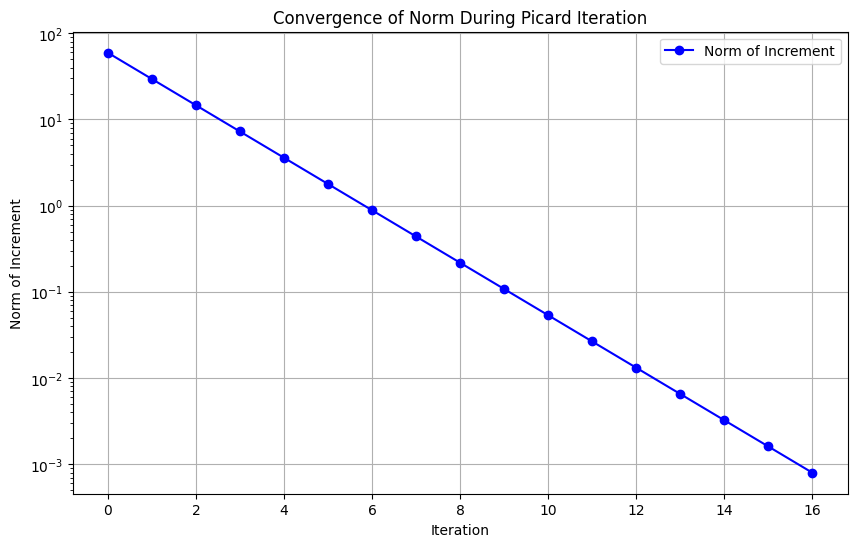

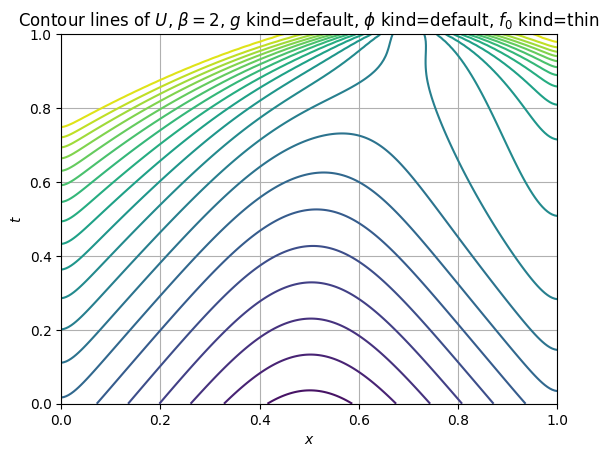

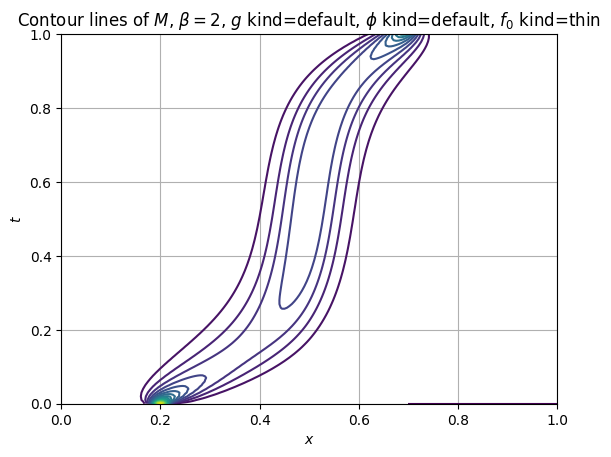

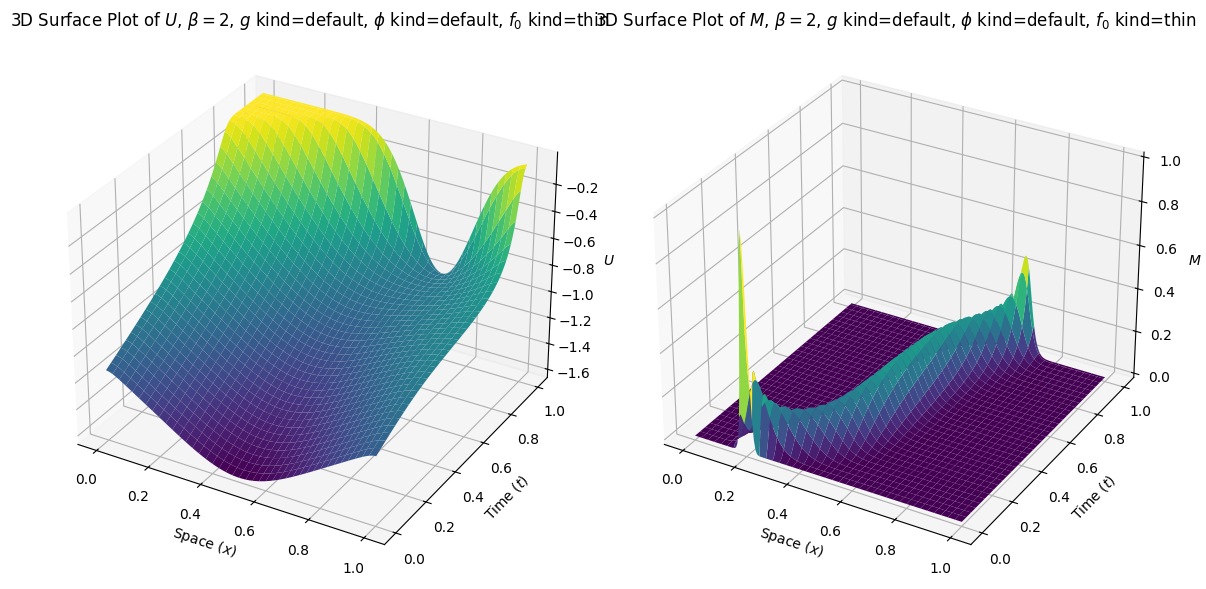

In [20]:
solve_equations(beta=2, g_kind='default', phi_kind='default', f0_tilde_kind='thin')


[Picard] Iteration 0, previous norm: inf, elapsed time: 7.152557373046875e-06
[Picard] Iteration 1, previous norm: 56.87115762660465, elapsed time: 2.3782312870025635
[Picard] Iteration 2, previous norm: 28.196926410820254, elapsed time: 4.726744890213013
[Picard] Iteration 3, previous norm: 13.980727560777526, elapsed time: 7.2019736766815186
[Picard] Iteration 4, previous norm: 6.932140448607663, elapsed time: 9.480000257492065
[Picard] Iteration 5, previous norm: 3.437241579818324, elapsed time: 12.714287042617798
[Picard] Iteration 6, previous norm: 1.7043373106790385, elapsed time: 15.013334274291992
[Picard] Iteration 7, previous norm: 0.8450892171840614, elapsed time: 17.27512836456299
[Picard] Iteration 8, previous norm: 0.4190350339279943, elapsed time: 19.540587663650513
[Picard] Iteration 9, previous norm: 0.20777744036107967, elapsed time: 21.78519606590271
[Picard] Iteration 10, previous norm: 0.10302589428825962, elapsed time: 25.441908597946167
[Picard] Iteration 11, pre

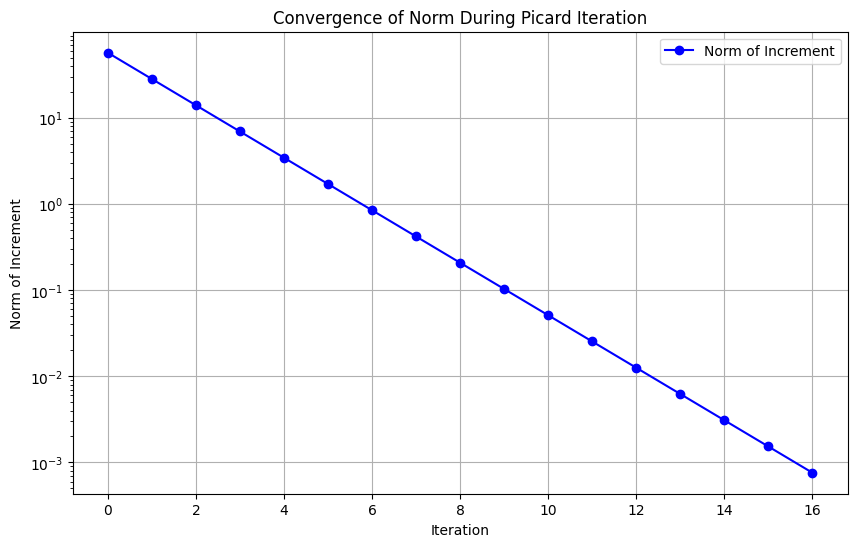

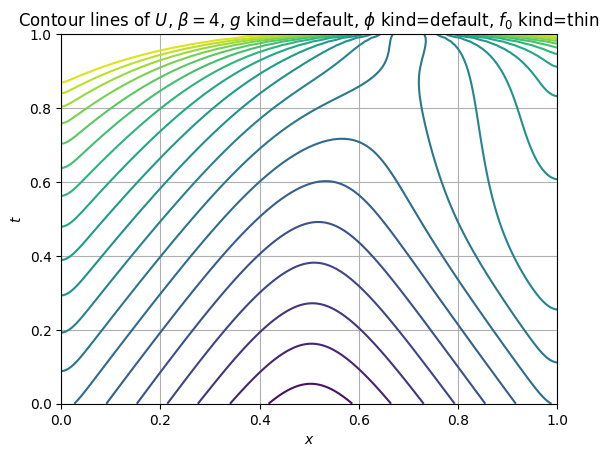

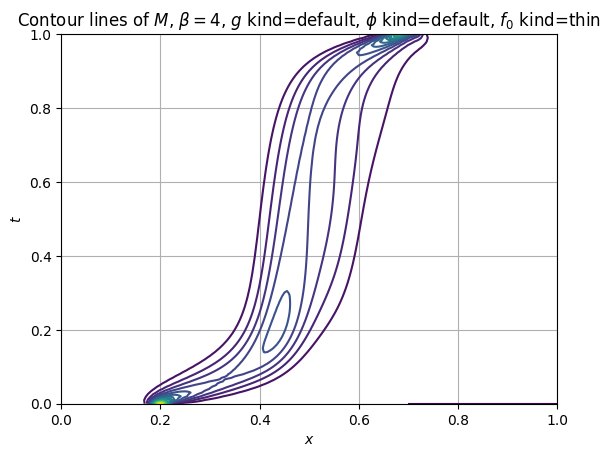

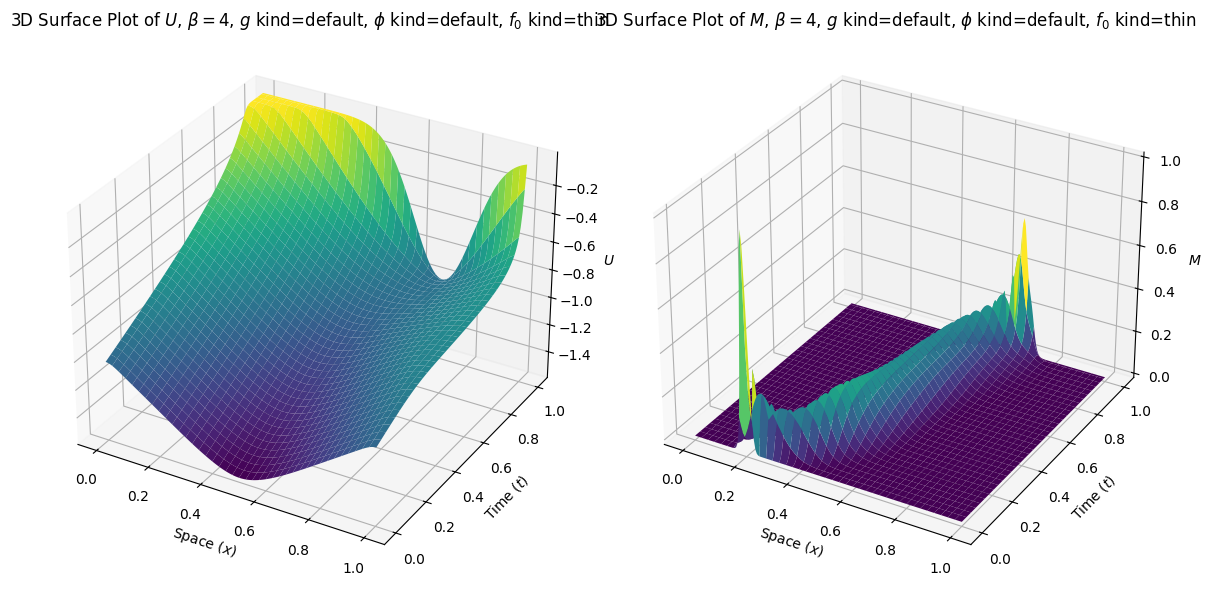

In [21]:
solve_equations(beta=4, g_kind='default', phi_kind='default', f0_tilde_kind='thin')


[Picard] Iteration 0, previous norm: inf, elapsed time: 5.7220458984375e-06
[Picard] Iteration 1, previous norm: 69.40572881655243, elapsed time: 2.404494047164917
[Picard] Iteration 2, previous norm: 34.52059242649504, elapsed time: 6.744279861450195
[Picard] Iteration 3, previous norm: 17.170233776018247, elapsed time: 8.993331670761108
[Picard] Iteration 4, previous norm: 8.540513197329066, elapsed time: 11.245893478393555
[Picard] Iteration 5, previous norm: 4.248139222786759, elapsed time: 13.487888097763062
[Picard] Iteration 6, previous norm: 2.113094785183709, elapsed time: 15.698644876480103
[Picard] Iteration 7, previous norm: 1.0510992840365785, elapsed time: 19.56856083869934
[Picard] Iteration 8, previous norm: 0.5228443217042132, elapsed time: 21.820242166519165
[Picard] Iteration 9, previous norm: 0.26007851173148233, elapsed time: 24.06322979927063
[Picard] Iteration 10, previous norm: 0.12937178742024744, elapsed time: 26.3643856048584
[Picard] Iteration 11, previous n

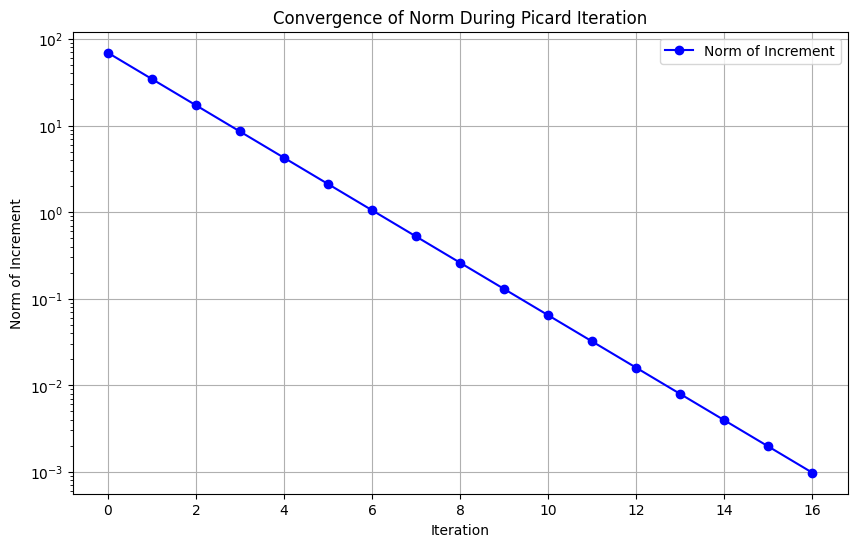

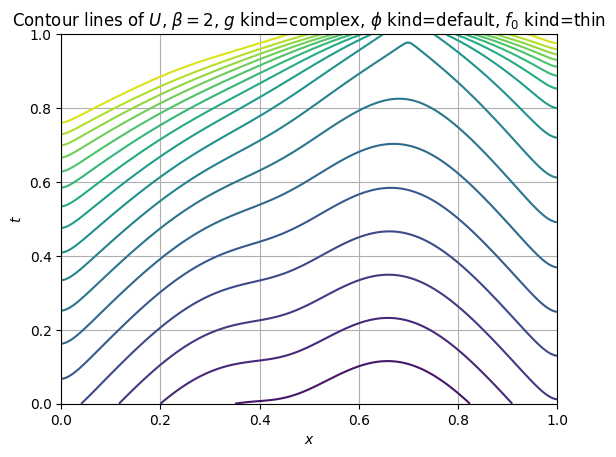

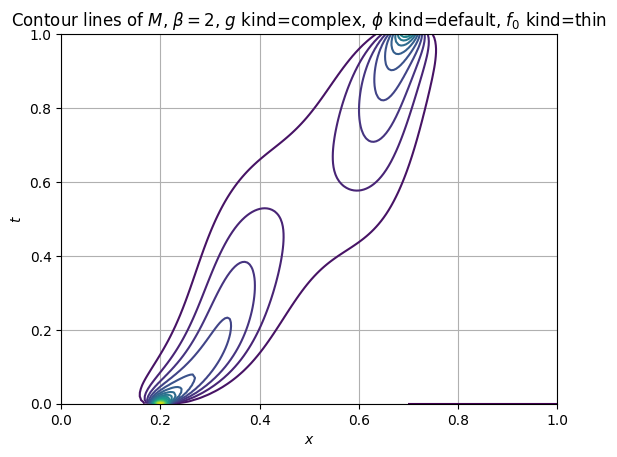

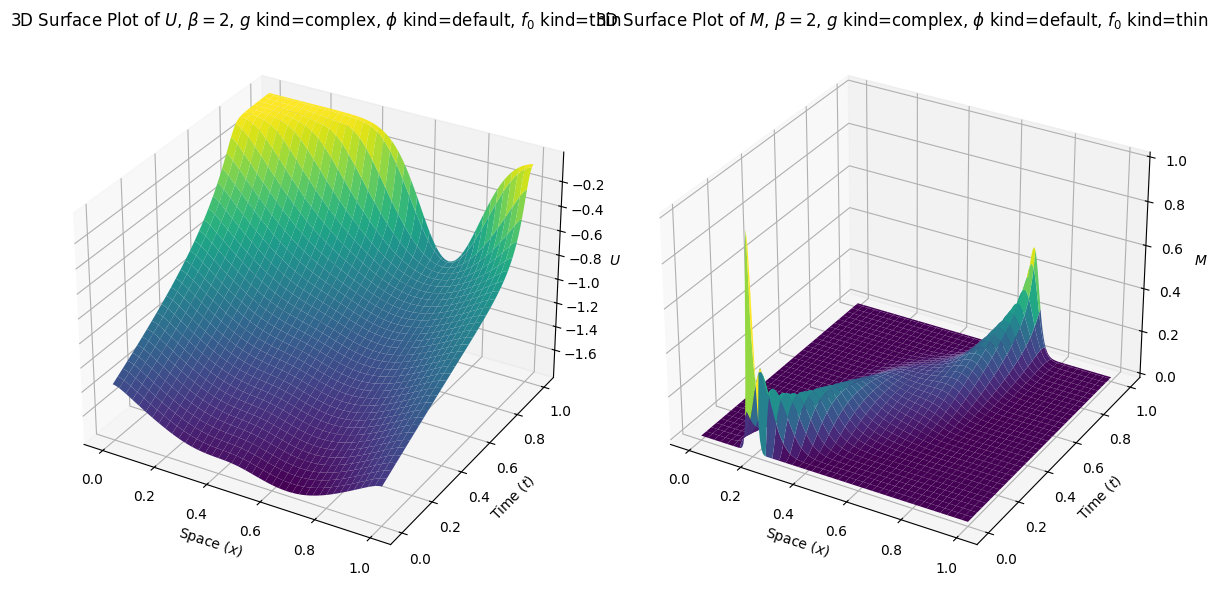

In [22]:
solve_equations(beta=2, g_kind='complex', phi_kind='default', f0_tilde_kind='thin')


[Picard] Iteration 0, previous norm: inf, elapsed time: 7.62939453125e-06
[Picard] Iteration 1, previous norm: 50.79532028312072, elapsed time: 2.3152310848236084
[Picard] Iteration 2, previous norm: 25.19661166958555, elapsed time: 6.2008748054504395
[Picard] Iteration 3, previous norm: 12.499826892727182, elapsed time: 8.402655839920044
[Picard] Iteration 4, previous norm: 6.201519020831107, elapsed time: 11.394361972808838
[Picard] Iteration 5, previous norm: 3.076937449999955, elapsed time: 13.614741802215576
[Picard] Iteration 6, previous norm: 1.5267321973167831, elapsed time: 15.874948501586914
[Picard] Iteration 7, previous norm: 0.7575812255996331, elapsed time: 18.102253675460815
[Picard] Iteration 8, previous norm: 0.3759386188565284, elapsed time: 20.323984146118164
[Picard] Iteration 9, previous norm: 0.1865630816775542, elapsed time: 24.096601486206055
[Picard] Iteration 10, previous norm: 0.09258813203525496, elapsed time: 26.366827964782715
[Picard] Iteration 11, previo

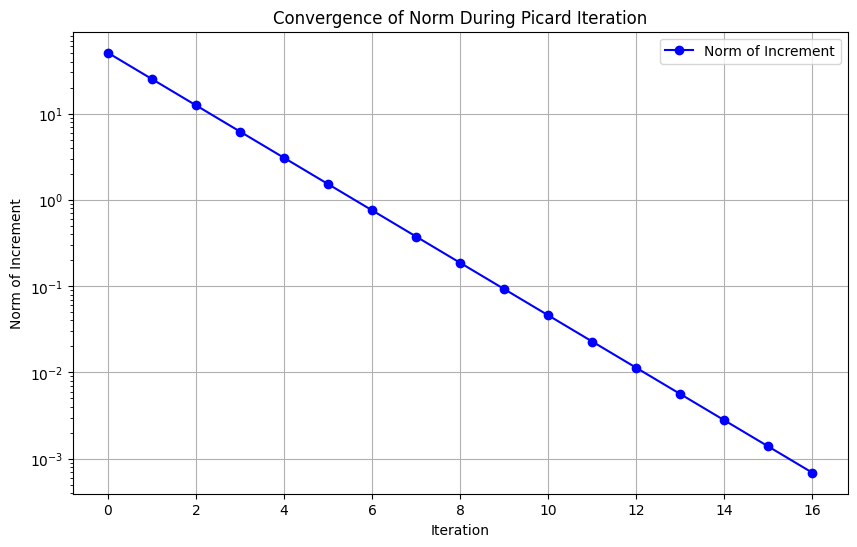

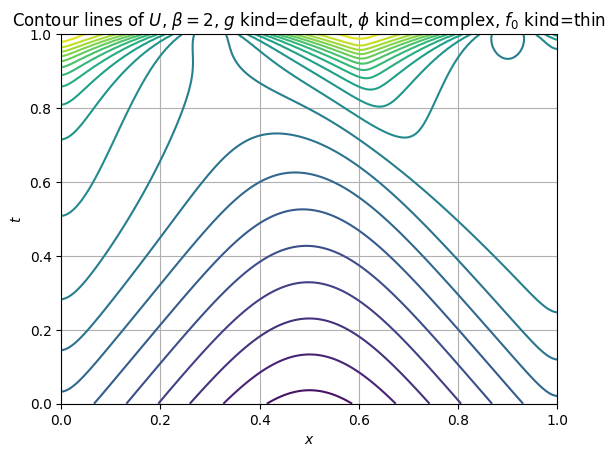

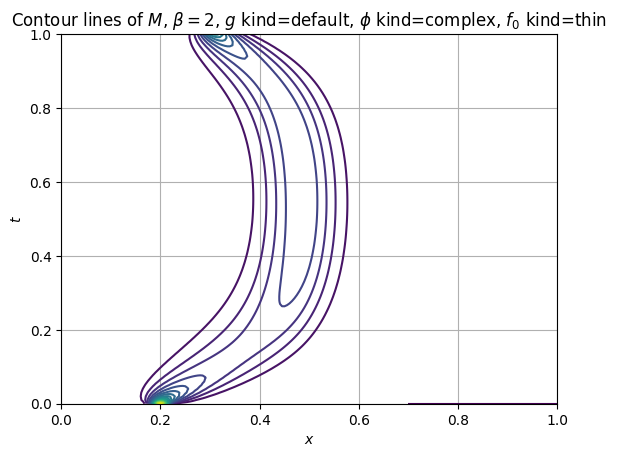

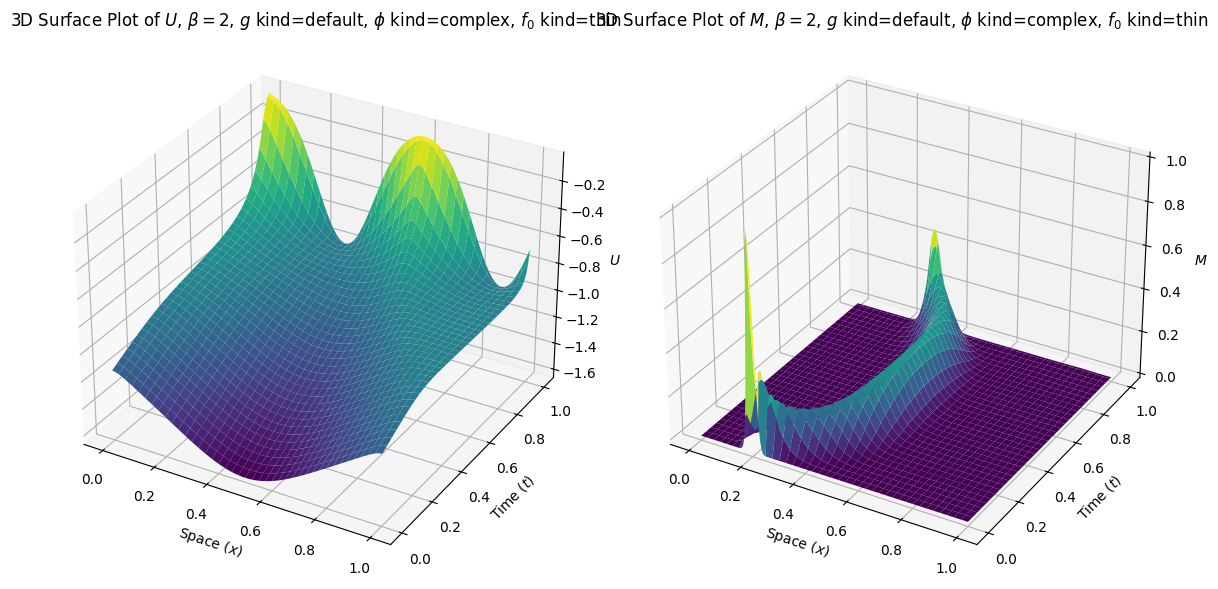

In [23]:
solve_equations(beta=2, g_kind='default', phi_kind='complex', f0_tilde_kind='thin')


[Picard] Iteration 0, previous norm: inf, elapsed time: 8.106231689453125e-06
[Picard] Iteration 1, previous norm: 60.44523927815046, elapsed time: 5.049414157867432
[Picard] Iteration 2, previous norm: 30.043142033725093, elapsed time: 7.723745584487915
[Picard] Iteration 3, previous norm: 14.934333682889905, elapsed time: 10.008111000061035
[Picard] Iteration 4, previous norm: 7.424490477946109, elapsed time: 12.338094711303711
[Picard] Iteration 5, previous norm: 3.691297166464764, elapsed time: 14.715365171432495
[Picard] Iteration 6, previous norm: 1.8353475482950592, elapsed time: 18.537596702575684
[Picard] Iteration 7, previous norm: 0.9126033358700083, elapsed time: 20.84583854675293
[Picard] Iteration 8, previous norm: 0.45380442677582605, elapsed time: 23.394216060638428
[Picard] Iteration 9, previous norm: 0.22567184129977755, elapsed time: 25.879941701889038
[Picard] Iteration 10, previous norm: 0.11222956399667593, elapsed time: 30.15484881401062
[Picard] Iteration 11, pr

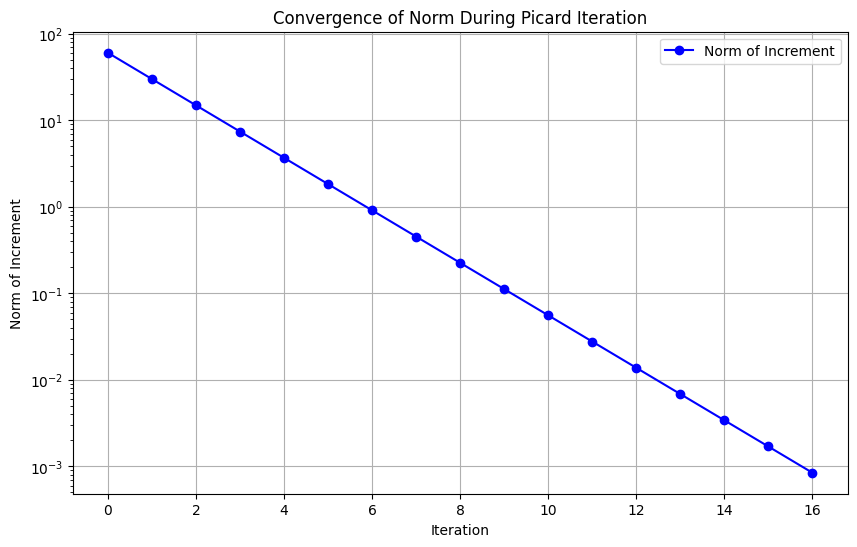

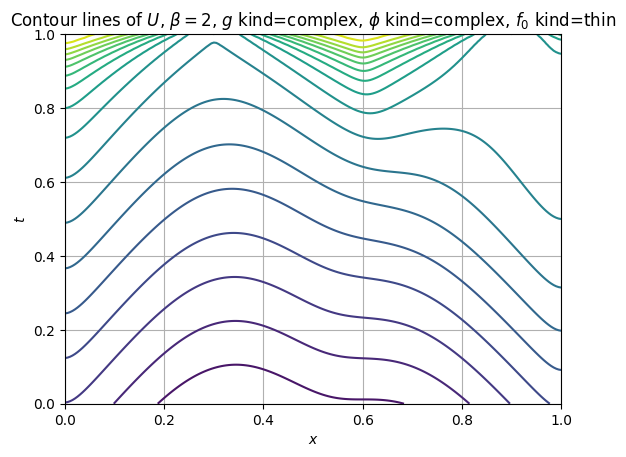

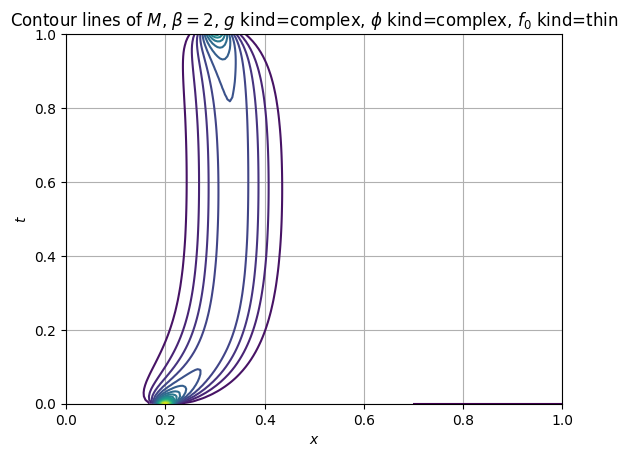

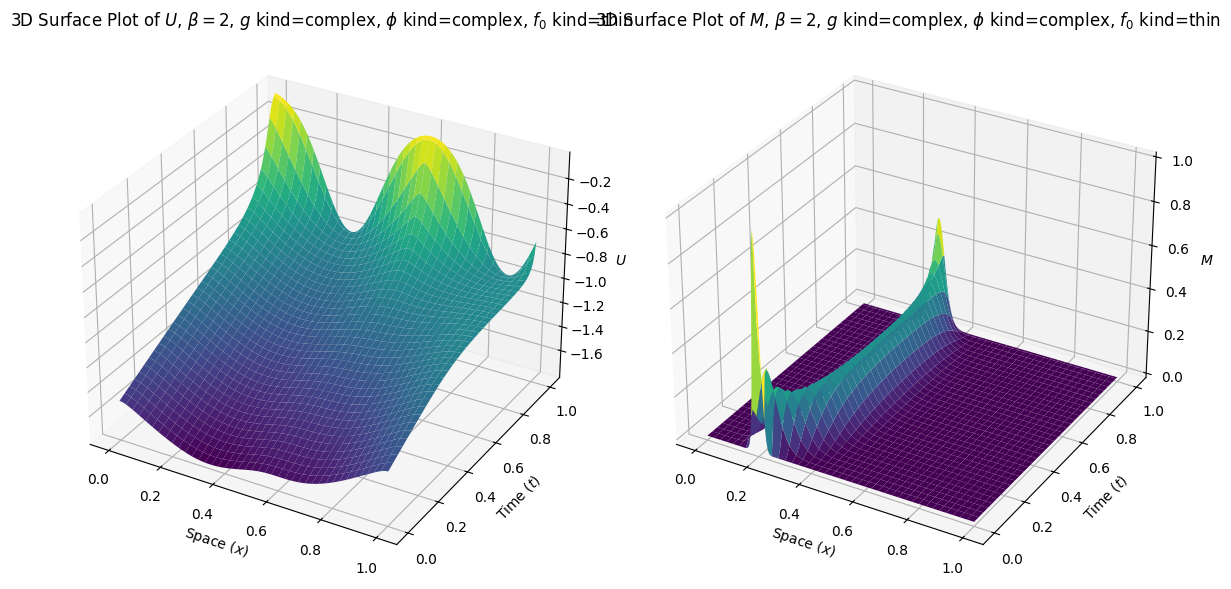

In [24]:
solve_equations(beta=2, g_kind='complex', phi_kind='complex', f0_tilde_kind='thin')


### Future Work

In the future, we plan to explore several advanced methods related to Hamilton-Jacobi-Bellman (HJB) equations:

1. **Mass Transport Image Registration**:
   - We will investigate numerical methods for the HJB formulation derived from the mass transport image registration model.
   - The PDE of the model (a Monge-Ampère equation) will be converted into an equivalent HJB equation.
   - We propose a monotone mixed discretization, proving that it converges to the viscosity solution.
   - We will introduce multigrid methods for the mixed discretization, with wide stencil points as coarse grid points and injection at these points as the restriction, ensuring a mesh-independent convergence rate.
   - A novel periodic boundary condition will be developed for image registration PDEs to accurately recover transformations involving translation and non-rigid deformations.

2. **American Options Pricing**:
   - We will explore deep neural network frameworks for solving HJB equations arising from American options pricing in high dimensions.
   - The HJB equation will be converted into an equivalent Backward Stochastic Differential Equation (BSDE).
   - The least squares residual of the BSDE will be used as the loss function, and a new neural network architecture will be introduced that incorporates domain knowledge of American options.
   - Our approach aims to yield American option prices and deltas for the entire spacetime, addressing the curse of dimensionality issue with a computational cost that scales quadratically with the dimension.

These advancements will enhance both the accuracy and efficiency of solving complex problems involving HJB equations.


## Discussion [10 pts]

Evaluate the results of your project including
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


### 1. **Why should I believe that your numerical results are correct?**

   - **Convergence Behavior:** The Picard iteration demonstrates clear convergence with the norm steadily decreasing at each iteration. This behavior aligns with expectations for a well-implemented iterative method, suggesting the algorithm is converging to a solution. The reduction in norm is an indicator of success, confirming that the method is working properly.
   
   - **Test Cases:** The results are validated against various test cases, ensuring correctness. The decreasing norm observed in the output is consistent with what we expect from a properly functioning Picard iteration. This aligns with the theoretical understanding of the method and provides confidence in its accuracy.
   
   - **Consistency with Theoretical Expectations:** The approach follows standard methods for solving Hamilton-Jacobi-Bellman (HJB) equations and Mean Field Games (MFG). The results are consistent with what we expect from a numerical solution to these equations. Additionally, the comparison of the fixed cost function $g(x) = - \exp(-40(x - 1/2)^2)$ over the contour lines of $M$ reveals a pattern shaped around $x = 1/2$, which is also consistent with theoretical expectations, further validating the correctness of the results.

---

### 2. **Did the project work (in your opinion)?**

   **Yes, the project worked.** The numerical method converged successfully, and the expected behavior (with the decreasing norm and no instability) was observed. The algorithm's results align with theoretical predictions, which suggests the numerical solution is both accurate and reliable. The project achieved its goal of solving the HJB equations for the Mean Field Games case, demonstrating that the method functions as intended.

---

### 3. **Next Steps if the project worked:**

   - **Extend the Method:** The next step would involve applying the method to more complex scenarios, such as problems involving multiple agents or additional constraints. Testing the algorithm on higher-dimensional Mean Field Games problems could provide valuable insights. Furthermore, exploring deep learning-based approaches to solve HJB equations could broaden the applicability and efficiency of the method.
   
   - **Future Extensions:** Future work could focus on implementing the method specifically for Mean Field Games but also exploring other applications such as mass transport image registration and pricing of American options. These extensions could provide more practical use cases and enhance the method’s versatility across different domains.
